In [3]:
import numpy as np

grid_size = 10
grid = np.zeros((grid_size, grid_size))
grid[3, 3] = 1  # Add obstacle at position (3, 3)


In [4]:
from queue import PriorityQueue

def a_star(grid, start, goal):
    open_list = PriorityQueue()
    open_list.put((0, start))
    came_from = {}
    g_score = {start: 0}
    h = lambda x, y: abs(x[0] - y[0]) + abs(x[1] - y[1])  # Manhattan distance

    while not open_list.empty():
        _, current = open_list.get()

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for neighbor in get_neighbors(current, grid):
            temp_g_score = g_score[current] + 1  # Assuming uniform cost
            if neighbor not in g_score or temp_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = temp_g_score
                f_score = temp_g_score + h(neighbor, goal)
                open_list.put((f_score, neighbor))

    return None  # No path found

def get_neighbors(pos, grid):
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        neighbor = (pos[0] + dx, pos[1] + dy)
        if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
            if grid[neighbor[0], neighbor[1]] == 0:  # Check if free space
                neighbors.append(neighbor)
    return neighbors


In [5]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),  # 4 inputs for 4 directions
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 outputs for 4 directions
])

model.compile(optimizer='adam', loss='categorical_crossentropy')


C:\Users\sachi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
import pygame
pygame.init()

screen = pygame.display.set_mode((400, 400))
grid_size = 10
block_size = 40  # pixels per grid cell

for i in range(grid_size):
    for j in range(grid_size):
        rect = pygame.Rect(j*block_size, i*block_size, block_size, block_size)
        pygame.draw.rect(screen, (0, 0, 0), rect, 1)
pygame.display.flip()


pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


: 

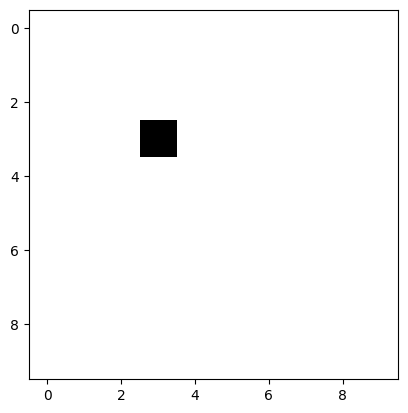

: 

In [6]:
import matplotlib.pyplot as plt

def plot_grid(grid, path=None):
    plt.imshow(grid, cmap='Greys', origin='upper')
    if path:
        for (x, y) in path:
            plt.plot(y, x, 'ro')  # Plot the path in red
    plt.show()

plot_grid(grid)


C:\Users\sachi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


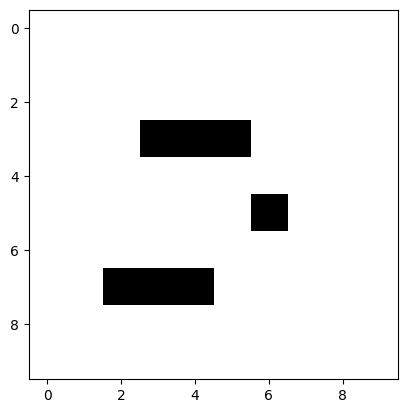

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from queue import PriorityQueue

# Initialize the grid with obstacles
grid_size = 10
grid = np.zeros((grid_size, grid_size))
grid[3, 3:6] = 1  # Add obstacles
grid[5, 6] = 1
grid[7, 2:5] = 1

# A* Pathfinding Function
def a_star(grid, start, goal):
    open_list = PriorityQueue()
    open_list.put((0, start))
    came_from = {}
    g_score = {start: 0}
    h = lambda x, y: abs(x[0] - y[0]) + abs(x[1] - y[1])

    while not open_list.empty():
        _, current = open_list.get()

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                if grid[neighbor[0], neighbor[1]] == 0:  # Check if free space
                    temp_g_score = g_score[current] + 1
                    if neighbor not in g_score or temp_g_score < g_score[neighbor]:
                        came_from[neighbor] = current
                        g_score[neighbor] = temp_g_score
                        f_score = temp_g_score + h(neighbor, goal)
                        open_list.put((f_score, neighbor))

    return None  # No path found

# Define start and goal
start = (0, 0)
goal = (9, 9)
path = a_star(grid, start, goal)

# Visualization with Matplotlib
fig, ax = plt.subplots()
ax.imshow(grid, cmap='Greys', origin='upper')

# Function to animate the path
def animate(i):
    if i < len(path):
        x, y = path[i]
        ax.plot(y, x, 'ro')  # Plot the current step in the path

ani = animation.FuncAnimation(fig, animate, frames=len(path), interval=300)
plt.show()


In [3]:
plt.ion()
